<a href="https://www.kaggle.com/code/archismancoder/debertaforseqclassification-lv2-emotions-hftrainer?scriptVersionId=226581086" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-tachygraphy/Tachygraphy_EmotionMoodtags_Dataset.csv
/kaggle/input/dataset-tachygraphy/Tachygraphy_MicroText-AIO-V3.xlsx
/kaggle/input/dataset-tachygraphy/Tachygraphy_MicroText-AIO-Emotion_Mood_Tags-V3.xlsx
/kaggle/input/dataset-tachygraphy/Tachygraphy_dataset_main.csv
/kaggle/input/dataset-tachygraphy/Tachygraphy_MicroText-AIO-Sentiment_Polarities_3_Label-V3.xlsx
/kaggle/input/dataset-tachygraphy/Tachygraphy_MicroText-AIO-Sentiment_Polarities_2_Label-V3 (Neutral Omitted).xlsx
/kaggle/input/dataset-tachygraphy/Tachygraphy_MicroText-AIO-V2.xlsx


# DATASET & PREPROCESSING

In [2]:
import emoji
from bs4 import BeautifulSoup
import os
import re
import string
import json

'''For emoji cleaning'''

'For emoji cleaning'

In [3]:
dataset = pd.read_excel('/kaggle/input/dataset-tachygraphy/Tachygraphy_MicroText-AIO-Emotion_Mood_Tags-V3.xlsx')

In [4]:
df=dataset

In [5]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
                       "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
                       "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                       "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                       "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                       "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                       "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                       "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would",
                       "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                       "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                       "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have",
                       "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'u.s':'america', 'e.g':'for example'}

punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-",
                 "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 
                 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', '!':' '}

mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater',
                'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ',
                'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can',
                'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 
                'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 
                'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 
                'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization',
                'demonetisation': 'demonetization'}

def clean_text(text):
    '''Clean emoji, Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
#     text = emoji.demojize(text)
#     text = re.sub(r'\:(.*?)\:','',text)
#     text = str(text).lower()    #Making Text Lowercase
#     text = re.sub('\[.*?\]', '', text)
    #The next 2 lines remove html text
    text = BeautifulSoup(text, 'lxml').get_text()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
    # replacing everything with space except (a-z, A-Z, 0-9, "%", ".", "&", ",", "'", "?", "!", ",", "'", ";", "-")
    text = re.sub(r"[^a-zA-Z0-9?.!,¿'%&,';-]+", " ", text)
    return text

def clean_contractions(text, mapping):
    '''Clean contraction using contraction mapping'''    
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    for word in mapping.keys():
        if ""+word+"" in text:
            text = text.replace(""+word+"", ""+mapping[word]+"")
    #Remove Punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    text = re.sub(r"([?.!,¿])", r" \1 ", text)
    text = re.sub(r'[" "]+', " ", text)
    return text

def clean_special_chars(text, punct, mapping):
    '''Cleans special characters present(if any)'''   
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

def correct_spelling(x, dic):
    '''Corrects common spelling errors'''   
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

def remove_space(text):
    '''Removes awkward spaces'''   
    #Removes awkward spaces 
    text = text.strip()
    text = text.split()
    return " ".join(text)

def text_preprocessing_pipeline(text):
    '''Cleaning and parsing the text.'''
#     text = clean_contractions(text, contraction_mapping)
    text = clean_text(text)
#     text = clean_contractions(text, contraction_mapping)
#     text = clean_special_chars(text, punct, punct_mapping)
#     text = correct_spelling(text, mispell_dict)
    text = remove_space(text)
    return text

In [6]:
df['Informal Text']

0                           omg, JEE prep is killing me rn
1                         u up 4 a break b4 UPSC revision?
2                              ttyl, finishing da CAT mock
3                        nah, dat GATE paper was brutal af
4                        sup? u done w/ ur IIT assignment?
                               ...                        
10275          bruh, UP’s power cuts, no relief in sight 🔌
10276    wtf, new tax laws hitting hard, prices gonna j...
10277    yo, Adani’s stock falling, more issues surfaci...
10278      bruh, tech IPOs doing well, investors excited 📉
10279    wtf, Delhi’s AQI at record highs, air quality ...
Name: Informal Text, Length: 10280, dtype: object

In [7]:
emotion_columns = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
df[emotion_columns] = df[emotion_columns].astype(float)

In [8]:
df['Informal Text'] = df['Informal Text'].astype(str)
# df['anger'] = df['anger'].astype(float)
# df['disgust'] = df['disgust'].astype(float)
# df['fear'] = df['fear'].astype(float)
# df['joy'] = df['joy'].astype(float)
# df['neutral'] = df['neutral'].astype(float)
# df['sadness'] = df['sadness'].astype(float)
# df['surprise'] = df['surprise'].astype(float)

In [9]:
df['Informal Text'] = df['Informal Text'].apply(lambda x: text_preprocessing_pipeline(x))

<ipython-input-5-93bb6d8e489f>:51: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()


In [10]:
df['Informal Text']

0                           omg, JEE prep is killing me rn
1                         u up 4 a break b4 UPSC revision?
2                              ttyl, finishing da CAT mock
3                        nah, dat GATE paper was brutal af
4                         sup? u done w ur IIT assignment?
                               ...                        
10275            bruh, UP s power cuts, no relief in sight
10276    wtf, new tax laws hitting hard, prices gonna jump
10277     yo, Adani s stock falling, more issues surfacing
10278        bruh, tech IPOs doing well, investors excited
10279    wtf, Delhi s AQI at record highs, air quality ...
Name: Informal Text, Length: 10280, dtype: object

In [11]:
df.drop(columns=['Expanded Meaning', 'pred', 'label', 'score'], inplace=True)

In [12]:
emotion_label_mapping = {
    0: "anger", 1: "disgust", 2: "fear", 3: "joy", 4: "neutral",
    5: "sadness", 6: "surprise"
}

In [13]:
EMOTION_LABELS = [
    "anger", "disgust", "fear", "joy", "neutral",
    "sadness", "surprise"
]

In [14]:
def test_train_split(dataset, test_ratio=0.1):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

In [15]:
train_ds_pd, validation_ds_pd = test_train_split(df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(validation_ds_pd)))

9283 examples in training, 997 examples in testing.


In [16]:
train_ds_pd = df
train_ds_pd = train_ds_pd.reset_index(drop=True)
validation_ds_pd = validation_ds_pd.reset_index(drop=True)

In [17]:
import torch
import torch.nn
import torch.nn as nn

### SETTING CUDA

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
from transformers import RobertaTokenizer, RobertaModel, DataCollatorWithPadding
from transformers import DebertaV2Model, DebertaV2Tokenizer, DebertaV2ForSequenceClassification
from torch.utils.data import Dataset, DataLoader

In [21]:
# tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
# tokenizer = DebertaV2Tokenizer.from_pretrained('microsoft/deberta-v3-base')

In [22]:
# !pip install optuna

## TORCH IMPORTS

In [23]:
from torch.optim import AdamW
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaModel
from sklearn.model_selection import train_test_split
import optuna
# from optuna.integration import PyTorchLightningPruner
from ray import tune
import ray
from ray import tune
from ray.tune import CLIReporter
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
from ray.tune.schedulers import ASHAScheduler
# from ray.tune.integration.pytorch import TuneReportCallback
from torch.amp import GradScaler, autocast
# from ray.tune.integration.optuna import OptunaSearch
from ray.tune.search.optuna import OptunaSearch
from ray import tune
from ray.tune.search.hyperopt import HyperOptSearch
from torch import autocast
# from ray import tune
# from ray.tune.integration.tensorboard import TensorBoardReporter
from ray.tune.logger import TBXLogger
from torch.utils.tensorboard import SummaryWriter
from ray.train import report
# from ray.tune.integration.jupyter import JupyterNotebookReporter
from ray.tune import JupyterNotebookReporter
# from torch.cuda.amp import GradScaler, autocast
from torch.optim.lr_scheduler import StepLR, CosineAnnealingLR
from ray.tune.schedulers import HyperBandScheduler, AsyncHyperBandScheduler

# DATASET CONFIG & ENCODING

In [24]:
# class EmotionDataset(Dataset):
#     def __init__(self, df, tokenizer):
#         self.df = df
#         self.tokenizer = tokenizer

#     def __len__(self):
#         return len(self.df)

#     def __getitem__(self, idx):
#         row = self.df.iloc[idx]
#         text = row["Informal Text"]
#         labels = torch.tensor(row[["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]].values, dtype=torch.float32)

#         encoding = self.tokenizer(text, truncation=True, padding=False, return_tensors="pt")  # No padding, handled later
#         return {key: val.squeeze(0) for key, val in encoding.items()}, labels

In [25]:
def tokenize_function(examples):
    tokens = tokenizer(examples["Informal Text"], truncation=False, padding=False)  # No padding, done later
    labels = torch.tensor([
        examples["anger"], examples["disgust"], examples["fear"],
        examples["joy"], examples["neutral"], examples["sadness"], examples["surprise"]
    ], dtype=torch.float32)
    return {**tokens, "labels": labels}

In [26]:
# class EmotionDataset(Dataset):
#     def __init__(self, dataframe, tokenizer, max_len = 2048):
#         self.tokenizer = tokenizer
#         self.data = dataframe
#         self.max_len = max_len

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, index):
#         text = str(self.data.iloc[index]['Informal Text'])
#         labels = self.data.iloc[index][['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']].values.astype(np.float32)
#         return {"text": text, "labels": labels}

In [27]:
def preprocess_function(examples):
    return tokenizer(examples['Informal Text'], padding="longest", truncation=False)

In [28]:
from transformers import AutoModel, AutoTokenizer, AutoConfig
from safetensors.torch import save_file, load_file
from huggingface_hub import hf_hub_download

In [29]:
# class DebertaForEmotionRegression(nn.Module):
#     def __init__(self, model_name=DebertaV2ForSequenceClassification.from_pretrained(
#         MODEL_NAME, 
#         num_labels=7,
#         device_map=torch.device("cuda" if torch.cuda.is_available() else "cpu")), num_labels=7):
#         super().__init__()
#         self.deberta = DebertaV2Model.from_pretrained(model_name)
#         self.dropout = nn.Dropout(0.1)
#         self.regressor = nn.Linear(self.deberta.config.hidden_size, num_labels)
    
#     def forward(self, input_ids, attention_mask, labels=None):
#         outputs = self.deberta(input_ids=input_ids, attention_mask=attention_mask)
#         pooled_output = outputs.last_hidden_state[:, 0, :]  # CLS token
#         pooled_output = self.dropout(pooled_output)
#         logits = self.regressor(pooled_output)  # No softmax, direct float output

#         loss = None
#         if labels is not None:
#             loss_fct = nn.MSELoss()
#             loss = loss_fct(logits, labels)
        
#         return {"loss": loss, "logits": logits} if loss is not None else {"logits": logits}

## NEW TRAIN & VALIDATION 2.0
### Custom metric is a metric for determining the best model free from any overfitting, underfitting. ```custom_metric = (avg_val_loss−val_accuracy) + α × ∣avg_train_loss−avg_val_loss∣ + β × ∣val_accuracy-train_accuracy∣``` This metric balances between low validation loss, high validation accuracy, and penalizing large discrepancies between training and validation loss. Note that, in the model selection we have used ```α = β = 0.5```


### But since, we have probabilistic values as input and output we cannot directly calculate the accuracy, infact we need to rely on loss only. ```custom_metric = avg_val_loss + α × ∣avg_train_loss−avg_val_loss∣```

In [30]:
# Custom metric calculation function
def calculate_custom_metric(avg_val_loss, avg_train_loss, alpha=0.5):
    loss_diff = abs(avg_train_loss - avg_val_loss)
    custom_metric = avg_val_loss + alpha * loss_diff
    return custom_metric

In [31]:
# # Custom metric calculation function
# def calculate_custom_metric(avg_val_loss, val_accuracy, avg_train_loss, train_accuracy, alpha=0.5, beta=0.5):
#     loss_diff = abs(avg_train_loss - avg_val_loss)
#     accuracy_diff = abs(train_accuracy - val_accuracy)
#     custom_metric = avg_val_loss - val_accuracy + alpha * loss_diff + beta * accuracy_diff
#     return custom_metric

# Model & Tokenizer

In [32]:
MODEL_NAME = 'microsoft/deberta-v3-base'

In [33]:
tokenizer = DebertaV2Tokenizer.from_pretrained(MODEL_NAME)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

In [34]:
model = DebertaV2ForSequenceClassification.from_pretrained(
    MODEL_NAME, 
    num_labels=7,
    device_map=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    problem_type="regression",
)

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
# data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")

In [36]:
from datasets import Dataset

In [37]:
train_dataset = Dataset.from_pandas(train_ds_pd)
val_dataset = Dataset.from_pandas(validation_ds_pd)

In [38]:
# train_dataset1 = train_dataset.map(preprocess_function)
# val_dataset1 = val_dataset.map(preprocess_function)

In [39]:
df.columns

Index(['Informal Text', 'anger', 'disgust', 'fear', 'joy', 'neutral',
       'sadness', 'surprise'],
      dtype='object')

In [40]:
train_dataset1 = train_dataset.map(tokenize_function, remove_columns=['Informal Text', 'anger', 'disgust', 'fear', 'joy', 'neutral',
       'sadness', 'surprise'])
val_dataset1 = val_dataset.map(tokenize_function, remove_columns=['Informal Text', 'anger', 'disgust', 'fear', 'joy', 'neutral',
       'sadness', 'surprise'])

Map:   0%|          | 0/10280 [00:00<?, ? examples/s]

Map:   0%|          | 0/997 [00:00<?, ? examples/s]

In [41]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")

In [42]:
# def collate_fn(batch):
#     inputs = [item[0] for item in batch]  
#     labels = torch.stack([item[1] for item in batch])  # Stack labels into (batch_size, 7)
    
#     # Use HF's DataCollatorWithPadding for dynamic padding
#     collator = DataCollatorWithPadding(tokenizer)
#     batch_inputs = collator(inputs)
    
#     batch_inputs["labels"] = labels  # Add labels separately
#     return batch_inputs

In [43]:
# train_dataset1 = EmotionDataset(train_dataset, tokenizer)
# val_dataset1 = EmotionDataset(val_dataset, tokenizer)

In [44]:
data_collator = DataCollatorWithPadding(tokenizer)

In [45]:
from torch.utils.tensorboard import SummaryWriter
# **TensorBoard Logging**
log_dir = "/kaggle/working/logs"
writer = SummaryWriter(log_dir=log_dir)

# Training

## Training Arguments

In [46]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./deberta-lv2-checkpoints",
    eval_strategy="steps",  # Evaluate at regular intervals
    save_strategy="steps",  # Save model checkpoints at regular steps
    logging_strategy="steps",  # Log at regular steps
    logging_dir="/kaggle/working/logs",  # Directory for TensorBoard logs
    logging_steps=100,  # Log loss/metrics every 50 steps
    log_level="debug",
    save_total_limit=2,  # Keep only the 2 latest checkpoints
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=1,
    learning_rate=5e-5,
    weight_decay=0.01,
    num_train_epochs=15,
    lr_scheduler_type="linear",
    warmup_steps=50,
    fp16=True,  # Mixed precision for efficiency
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    report_to=["tensorboard"],
)


In [47]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset1,
    eval_dataset=val_dataset1,
    tokenizer=tokenizer,
    data_collator=data_collator  # Ensures dynamic padding
)


trainer.train()

<ipython-input-47-f38e9ed159e4>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
You have loaded a model on multiple GPUs. `is_model_parallel` attribute will be force-set to `True` to avoid any unexpected behavior such as device placement mismatching.
Using auto half precision backend
Currently training with a batch size of: 8
***** Running training *****
  Num examples = 10,280
  Num Epochs = 15
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 19,275
  Number of trainable parameters = 184,427,527


Step,Training Loss,Validation Loss
100,0.067600,0.053601
200,0.051100,0.041610
300,0.044300,0.033234
400,0.040900,0.031359
500,0.036200,0.032037
600,0.037600,0.030410
700,0.035400,0.027061
800,0.032500,0.027320
900,0.031800,0.027838
1000,0.030900,0.026083



***** Running Evaluation *****
  Num examples = 997
  Batch size = 8

***** Running Evaluation *****
  Num examples = 997
  Batch size = 8

***** Running Evaluation *****
  Num examples = 997
  Batch size = 8

***** Running Evaluation *****
  Num examples = 997
  Batch size = 8

***** Running Evaluation *****
  Num examples = 997
  Batch size = 8
Saving model checkpoint to ./deberta-lv2-checkpoints/checkpoint-500
Configuration saved in ./deberta-lv2-checkpoints/checkpoint-500/config.json
Model weights saved in ./deberta-lv2-checkpoints/checkpoint-500/model.safetensors
tokenizer config file saved in ./deberta-lv2-checkpoints/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./deberta-lv2-checkpoints/checkpoint-500/special_tokens_map.json
added tokens file saved in ./deberta-lv2-checkpoints/checkpoint-500/added_tokens.json

***** Running Evaluation *****
  Num examples = 997
  Batch size = 8

***** Running Evaluation *****
  Num examples = 997
  Batch size = 8

***** Run

TrainOutput(global_step=19275, training_loss=0.008383475622082498, metrics={'train_runtime': 2816.5282, 'train_samples_per_second': 54.748, 'train_steps_per_second': 6.844, 'total_flos': 2135897063981280.0, 'train_loss': 0.008383475622082498, 'epoch': 15.0})

# Save the best model


In [48]:
from transformers import AutoModel, AutoTokenizer, AutoConfig
from safetensors.torch import save_file, load_file
from huggingface_hub import hf_hub_download

In [49]:
model.save_pretrained("/kaggle/working/deberta_seqcls_lv2_finetuned")
tokenizer.save_pretrained("/kaggle/working/deberta_seqcls_lv2_finetuned")
print("Model saved successfully!")

Configuration saved in /kaggle/working/deberta_seqcls_lv2_finetuned/config.json
Model weights saved in /kaggle/working/deberta_seqcls_lv2_finetuned/model.safetensors
tokenizer config file saved in /kaggle/working/deberta_seqcls_lv2_finetuned/tokenizer_config.json
Special tokens file saved in /kaggle/working/deberta_seqcls_lv2_finetuned/special_tokens_map.json
added tokens file saved in /kaggle/working/deberta_seqcls_lv2_finetuned/added_tokens.json


Model saved successfully!


In [50]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
# secret_value_0 = user_secrets.get_secret("HF_READ_TOKEN")
# secret_value_1 = user_secrets.get_secret("HF_READ_WRITE_TOKEN")

In [51]:
from huggingface_hub import login

login(token=user_secrets.get_secret("HF_READ_TOKEN"))

In [52]:
from huggingface_hub import login

# Replace 'your_hf_token' with your actual Hugging Face API token
login(token=user_secrets.get_secret("HF_READ_WRITE_TOKEN"))

In [53]:
from huggingface_hub import HfApi, create_repo, upload_folder

# Define your Hugging Face repo ID
repo_id = "tachygraphy-microtrext-norm-org/DeBERTa-v3-seqClassfication-LV2-EmotionMoodtags-Batch8"  # Example

# Local directory where all your model files are stored
local_model_dir = "/kaggle/working/deberta_seqcls_lv2_finetuned"

# Initialize API instance
api = HfApi()

# Create the repo if it doesn't exist
create_repo(repo_id, exist_ok=True)

# Upload all the files from the local directory to the Hugging Face Hub
upload_folder(
    folder_path=local_model_dir,  # Path to the folder to upload
    repo_id=repo_id,              # Repo ID on Hugging Face
    repo_type="model"             # Specify it's a model repo
)

print(f"All files uploaded to Hugging Face under {repo_id}")

model.safetensors:   0%|          | 0.00/738M [00:00<?, ?B/s]

All files uploaded to Hugging Face under tachygraphy-microtrext-norm-org/DeBERTa-v3-seqClassfication-LV2-EmotionMoodtags-Batch8


# PREDICT ON RANDOM INPUT

## Prediction Function

In [54]:
# def predict(text, model, tokenizer, device, max_len=128):
#     # model.eval()  # Set model to evaluation mode

#     # Tokenize and pad the input text
#     inputs = tokenizer(
#         text,
#         None,
#         add_special_tokens=True,
#         padding=True,
#         truncation=False,
#         return_tensors="pt",
#         return_token_type_ids=False,
#     ).to(device)  # Move input tensors to the correct device

#     with torch.no_grad():
#         outputs = model(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"])

#     # Apply sigmoid activation (for BCEWithLogitsLoss)
#     probabilities = torch.sigmoid(outputs).cpu().numpy()

#     return probabilities

In [55]:
def predict(text, model, tokenizer, device, max_len=128):
    # model.eval()  # Set model to evaluation mode

    # Tokenize and pad the input text dynamically
    inputs = tokenizer(
        text,
        padding=True,  # Ensures correct padding for batch inference
        truncation=False,  # Prevents overly long sequences
        return_tensors="pt",
    ).to(device)  # Move input tensors to the correct device

    with torch.no_grad():
        outputs = model(**inputs)  # Forward pass

    # Extract logits (raw float values) directly
    predictions = outputs.logits.cpu().numpy()  

    return predictions 

In [56]:
best_model = model
best_model = best_model.to(device)

In [57]:
import matplotlib.pyplot as plt
import plotly.express as px

## Samples & Random Predictions

In [58]:
!pip install -U -q kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 20.6 MB/s eta 0:00:00


In [59]:
from IPython.display import Image

Predicted emotions for 'plz send the doc asap i need it by toni8': [[ 0.01487732 -0.00411987  0.02645874  0.04983521  0.88183594  0.04415894
   0.02233887]]


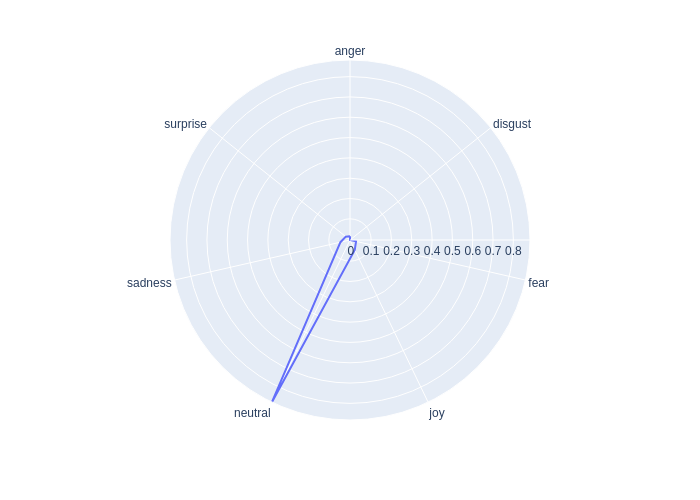

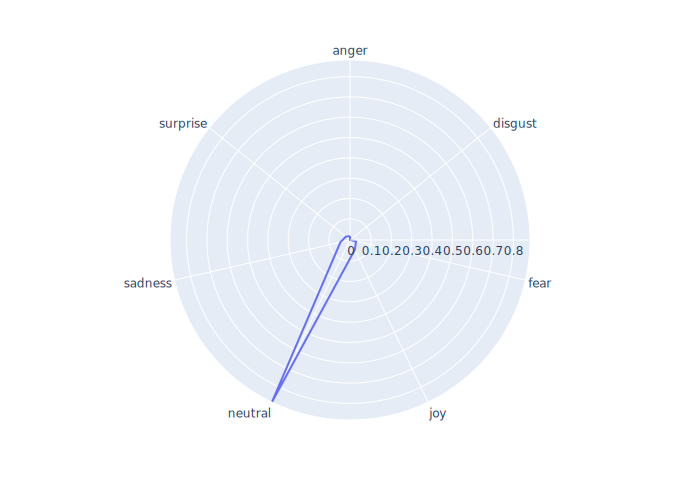

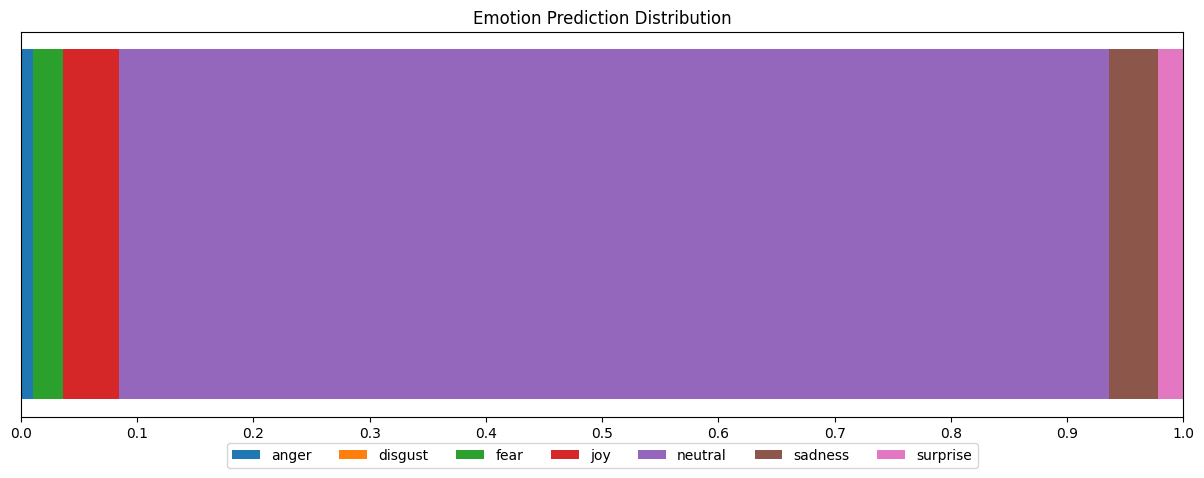

In [60]:
sample_text = "plz send the doc asap i need it by toni8"
predictions = predict(sample_text, best_model, tokenizer, device, max_len=128)
print(f"Predicted emotions for '{sample_text}': {predictions}")


predictions_array = predictions.squeeze()  # Remove unnecessary dimensions

emotion_moodtags = []
for items in predictions_array:
    emotion_moodtags.append(items)

fig = px.line_polar(pd.DataFrame(dict(r=emotion_moodtags, theta=EMOTION_LABELS)), r='r', theta='theta', line_close=True)
# fig.show()

fig.show(renderer="png")  # Renders as PNG
fig.show(renderer="svg")  # Renders as SVG

# fig.write_image("/kaggle/working/pp_test1.png")

# Display the image (this will work for static rendering in platforms like Kaggle)

# Image("/kaggle/working/pp_test1.png")
# display(fig)
    
# Since predictions are probabilistic values, normalize to ensure they sum up to 1
normalized_predictions = predictions_array / predictions_array.sum()  # Normalize the values


## Horizontal Stacked Bar Plot

fig, ax = plt.subplots(figsize=(15, 5))

left = 0
for i in range(len(normalized_predictions)):
    ax.barh(0, normalized_predictions[i], color=plt.cm.tab10(i), left=left, label=EMOTION_LABELS[i])
    left += normalized_predictions[i]

# Add legend
ax.set_xlim(0, 1)
ax.set_yticks([])
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(EMOTION_LABELS))

# Add title
plt.title('Emotion Prediction Distribution')

plt.show()

Predicted emotions for 'hey! hru, wanna ply valo toni8?': [[0.01502228 0.00232887 0.00418854 0.10229492 0.4025879  0.03041077
  0.42138672]]


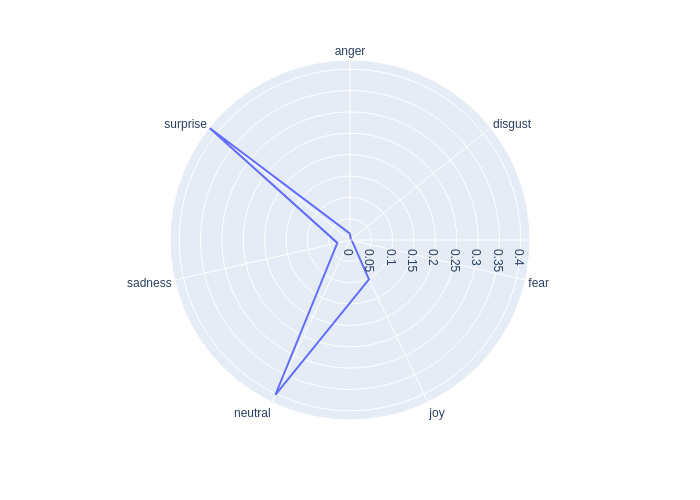

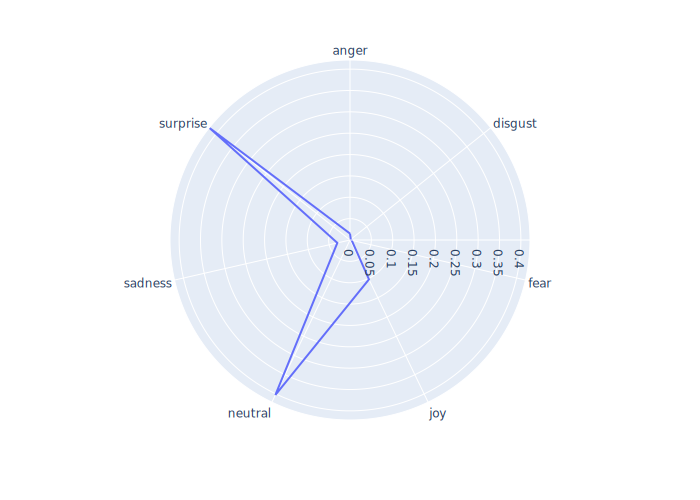

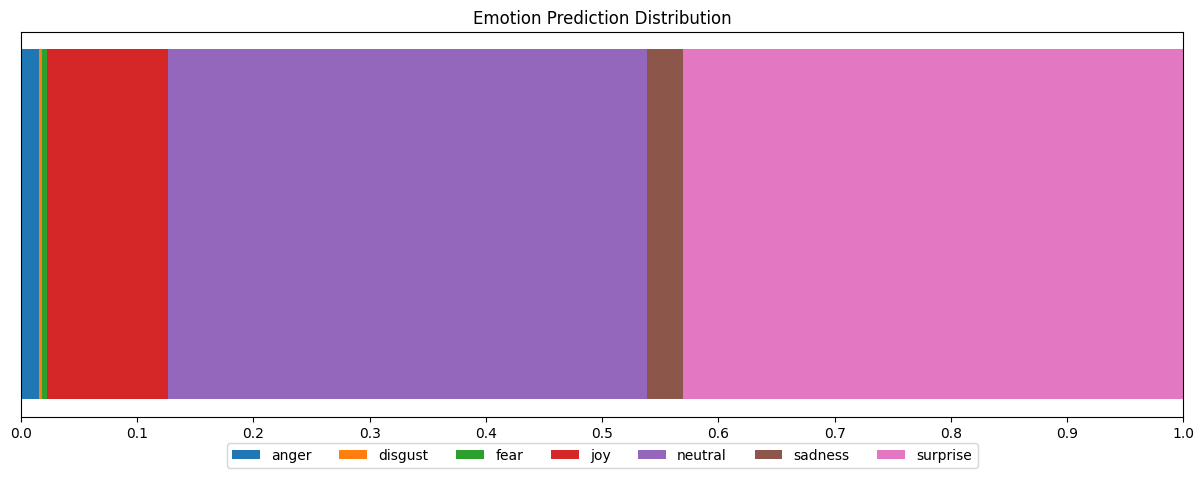

In [61]:
sample_text = "hey! hru, wanna ply valo toni8?"
predictions = predict(sample_text, best_model, tokenizer, device, max_len=128)
print(f"Predicted emotions for '{sample_text}': {predictions}")


predictions_array = predictions.squeeze()  # Remove unnecessary dimensions

emotion_moodtags = []
for items in predictions_array:
    emotion_moodtags.append(items)

fig = px.line_polar(pd.DataFrame(dict(r=emotion_moodtags, theta=EMOTION_LABELS)), r='r', theta='theta', line_close=True)
# fig.show()

fig.show(renderer="png")  # Renders as PNG
fig.show(renderer="svg")  # Renders as SVG

# fig.write_image("/kaggle/working/pp_test2.png")

# Display the image (this will work for static rendering in platforms like Kaggle)

# Image("/kaggle/working/pp_test2.png")
# display(fig)
    
# Since predictions are probabilistic values, normalize to ensure they sum up to 1
normalized_predictions = predictions_array / predictions_array.sum()  # Normalize the values


## Horizontal Stacked Bar Plot

fig, ax = plt.subplots(figsize=(15, 5))

left = 0
for i in range(len(normalized_predictions)):
    ax.barh(0, normalized_predictions[i], color=plt.cm.tab10(i), left=left, label=EMOTION_LABELS[i])
    left += normalized_predictions[i]

# Add legend
ax.set_xlim(0, 1)
ax.set_yticks([])
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(EMOTION_LABELS))

# Add title
plt.title('Emotion Prediction Distribution')

plt.show()

Predicted emotions for 'what a badass char is arthur, he is the best game char ever made, i luv rdr2': [[-0.01486206 -0.00980377  0.01161194  0.8417969   0.02380371  0.01527405
   0.13671875]]


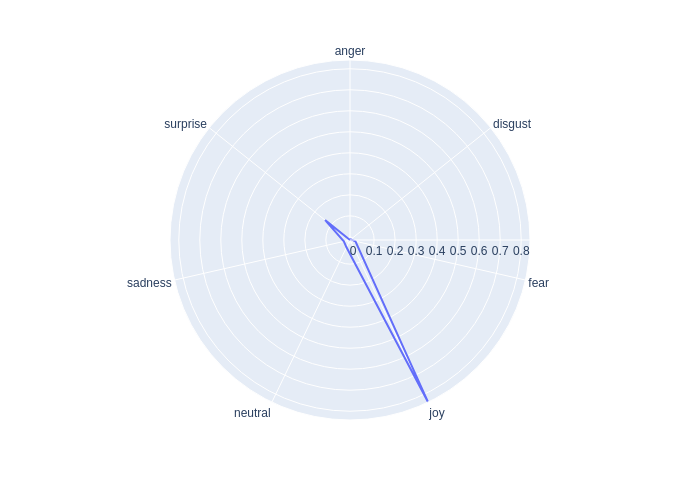

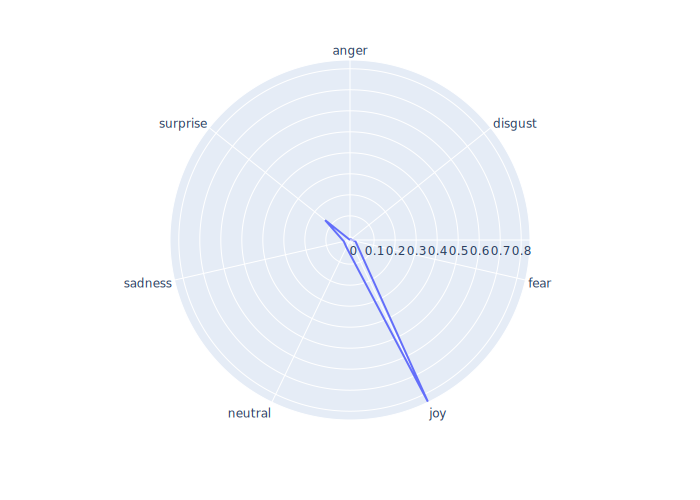

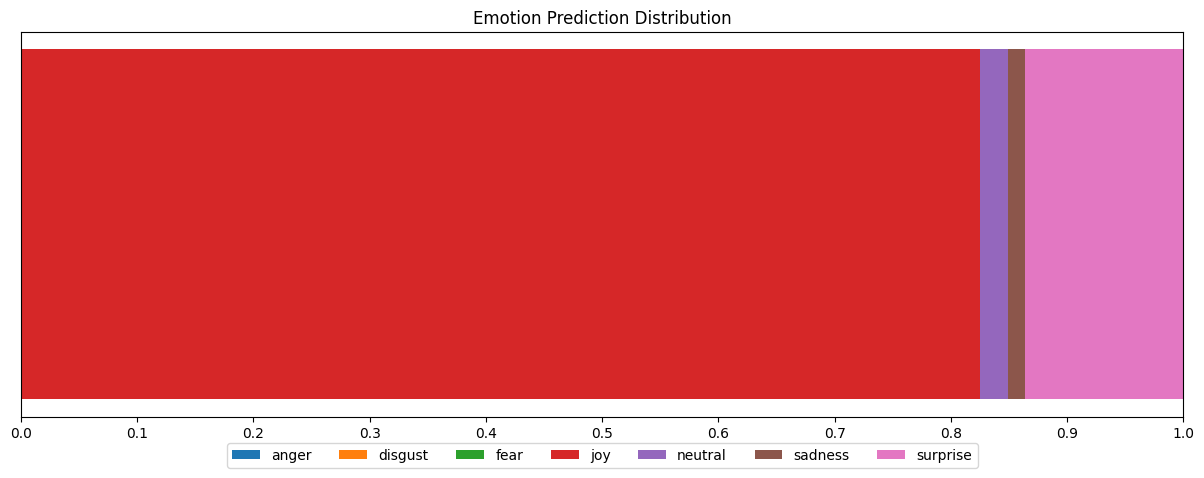

In [62]:
sample_text = "what a badass char is arthur, he is the best game char ever made, i luv rdr2"
predictions = predict(sample_text, best_model, tokenizer, device, max_len=128)
print(f"Predicted emotions for '{sample_text}': {predictions}")

predictions_array = predictions.squeeze()  # Remove unnecessary dimensions


emotion_moodtags = []
for items in predictions_array:
    emotion_moodtags.append(items)

fig = px.line_polar(pd.DataFrame(dict(r=emotion_moodtags, theta=EMOTION_LABELS)), r='r', theta='theta', line_close=True)
# fig.show()

# fig = px.line_polar(pd.DataFrame(dict(r=emotion_moodtags, theta=EMOTION_LABELS)), r='r', theta='theta', line_close=True)
# fig.show()


fig.show(renderer="png")  # Renders as PNG
fig.show(renderer="svg")  # Renders as SVG

# fig.write_image("/kaggle/working/pp_test3.png")

# Display the image (this will work for static rendering in platforms like Kaggle)

# Image("/kaggle/working/pp_test3.png")
# display(fig)
    
# Since predictions are probabilistic values, normalize to ensure they sum up to 1
normalized_predictions = predictions_array / predictions_array.sum()  # Normalize the values

## Horizontal Stacked Bar Plot

fig, ax = plt.subplots(figsize=(15, 5))

left = 0
for i in range(len(normalized_predictions)):
    ax.barh(0, normalized_predictions[i], color=plt.cm.tab10(i), left=left, label=EMOTION_LABELS[i])
    left += normalized_predictions[i]

# Add legend
ax.set_xlim(0, 1)
ax.set_yticks([])
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(EMOTION_LABELS))

# Add title
plt.title('Emotion Prediction Distribution')

plt.show()


Predicted emotions for 'I don't no fr y hes sooo sad.': [[-0.00114441 -0.02905273  0.01731873 -0.04693604  0.01213837  1.0117188
   0.03643799]]


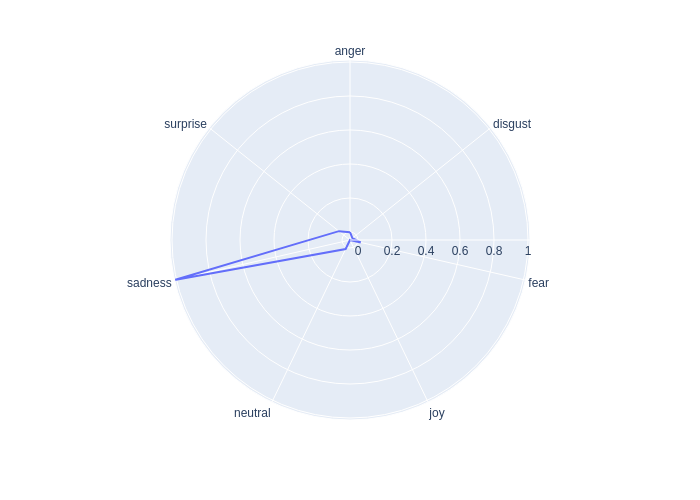

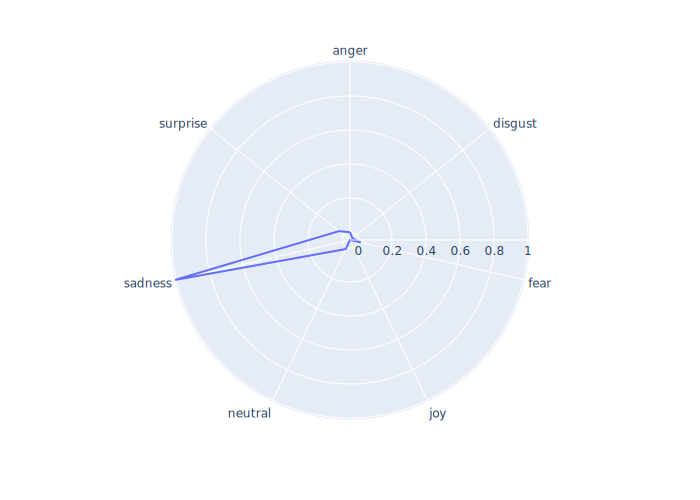

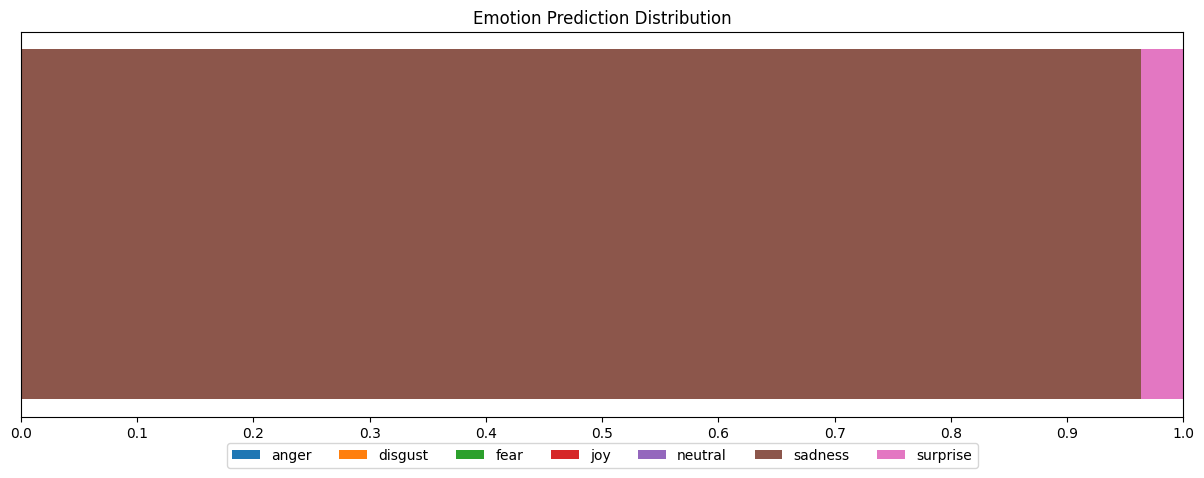

In [63]:
sample_text = "I don't no fr y hes sooo sad."
predictions = predict(sample_text, best_model, tokenizer, device, max_len=128)
print(f"Predicted emotions for '{sample_text}': {predictions}")

predictions_array = predictions.squeeze()  # Remove unnecessary dimensions


emotion_moodtags = []
for items in predictions_array:
    emotion_moodtags.append(items)

fig = px.line_polar(pd.DataFrame(dict(r=emotion_moodtags, theta=EMOTION_LABELS)), r='r', theta='theta', line_close=True)
# fig.show()

# fig = px.line_polar(pd.DataFrame(dict(r=emotion_moodtags, theta=EMOTION_LABELS)), r='r', theta='theta', line_close=True)
# fig.show()


fig.show(renderer="png")  # Renders as PNG
fig.show(renderer="svg")  # Renders as SVG

# fig.write_image("/kaggle/working/pp_test4.png")

# Display the image (this will work for static rendering in platforms like Kaggle)

# Image("/kaggle/working/pp_test4.png")
# display(fig)
    
# Since predictions are probabilistic values, normalize to ensure they sum up to 1
normalized_predictions = predictions_array / predictions_array.sum()  # Normalize the values

## Horizontal Stacked Bar Plot

fig, ax = plt.subplots(figsize=(15, 5))

left = 0
for i in range(len(normalized_predictions)):
    ax.barh(0, normalized_predictions[i], color=plt.cm.tab10(i), left=left, label=EMOTION_LABELS[i])
    left += normalized_predictions[i]

# Add legend
ax.set_xlim(0, 1)
ax.set_yticks([])
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(EMOTION_LABELS))

# Add title
plt.title('Emotion Prediction Distribution')

plt.show()
